# HW7 APIs - MTA API 

#### Authors: Ling Lin, Xuanyu Lu, Qingyang Xiao

Reference: https://github.com/nolanbconaway/underground

In [152]:
import os

from underground import metadata, SubwayFeed

In [176]:
API_KEY = '5H3pxsm5LT8OwtBs9LWoWaNGf0j67zER1dxQL214'
ROUTE = 'Q'

feed = SubwayFeed.get(ROUTE, api_key=API_KEY)

In [177]:
q_train_stops = feed.extract_stop_dict()[ROUTE]

In [178]:
q_train_stops

{'Q04N': [datetime.datetime(2020, 4, 8, 0, 8, 56, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 0, 37, 31, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 0, 42, 56, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 23, 45, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 43, 45, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 2, 3, 45, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)],
 'Q05N': [datetime.datetime(2020, 4, 8, 0, 11, 41, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 0, 41, 16, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 0, 46, 41, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 27, 30, tzinfo=<DstTzInfo 'US/Eastern' ED

### Transform online data into python dataframe

References Used:
1. https://thispointer.com/pandas-convert-dataframe-index-into-column-using-dataframe-reset_index-in-python/
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
3. https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
4. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

In [179]:
import pandas as pd

In [180]:
# Convert online data from dictionary format into python dataframe

Schedule = pd.DataFrame.from_dict(q_train_stops, orient='index')

In [181]:
# Uncomment to see what the original dataframe looks like

Schedule

,0,1,2,3,4,5
Q04N,2020-04-08 00:08:56-04:00,2020-04-08 00:37:31-04:00,2020-04-08 00:42:56-04:00,2020-04-08 01:23:45-04:00,2020-04-08 01:43:45-04:00,2020-04-08 02:03:45-04:00
Q05N,2020-04-08 00:11:41-04:00,2020-04-08 00:41:16-04:00,2020-04-08 00:46:41-04:00,2020-04-08 01:27:30-04:00,2020-04-08 01:47:30-04:00,2020-04-08 02:07:30-04:00
Q01N,2020-04-08 00:13:16-04:00,2020-04-08 00:20:11-04:00,2020-04-08 01:01:00-04:00,2020-04-08 01:21:00-04:00,2020-04-08 01:41:00-04:00,NaT
R22N,2020-04-08 00:15:16-04:00,2020-04-08 00:22:11-04:00,2020-04-08 01:03:00-04:00,2020-04-08 01:23:00-04:00,2020-04-08 01:43:00-04:00,NaT
R21N,2020-04-08 00:17:16-04:00,2020-04-08 00:23:41-04:00,2020-04-08 01:04:30-04:00,2020-04-08 01:24:30-04:00,2020-04-08 01:44:30-04:00,NaT
...,...,...,...,...,...,...
D30N,2020-04-08 00:41:00-04:00,2020-04-08 01:01:00-04:00,2020-04-08 01:21:00-04:00,NaT,NaT,NaT
D29N,2020-04-08 00:41:30-04:00,2020-04-08 01:01:30-04:00,2020-04-08 01:21:30-04:00,NaT,NaT,NaT
D28N,2020-04-08 00:43:00-04:00,2020-04-08 01:03:00-04:00,2020-04-08 01:23:00-04:00,NaT,NaT,NaT
D27N,2020-04-08 00:44:30-04:00,2020-04-08 01:04:30-04:00,2020-04-08 01:24:30-04:00,NaT,NaT,NaT


In [182]:
# Add the index to be a new column in dataframe
# The original index is stop_id, so add stop_id to be a new column of dataframe

Schedule1 = Schedule.reset_index()

# Rename the newly added column as "stop_id"
Schedule2 = Schedule1.rename(columns={'index':'stop_id'})


# Read the last character of stop_id to identify the direction, N represents North, S represents South
Direction = []

for i in range(0, len(Schedule)):
    Direction.append(Schedule2.stop_id[i][-1])
        
# Direction

# Insert the new direction column to a specific postion, e.g. position 1 in this case
# Do not run this code the second time without rerun the above codes, 
# because it will appear an error if the column is already inserted 

Schedule2.insert(1, 'direction', Direction)

# Extract date information from the Timestamp column, create a new column and insert it to position 2
Schedule2.insert(2, 'date', Schedule2[0].dt.date)


# Another way of adding a new column to dataframe, but no specific position
# Schedule2['direction'] = Direction
# Schedule2['date'] = Schedule2[0].dt.date


# Replace the original Timestamp columns (Timestamp shows date and time) with time only

for j in range(0, len(Schedule2)):                # loop through rows
    for k in range(3, len(Schedule2.iloc[0])):       # loop through columns 
        if pd.notna(Schedule2.iloc[j, k]):              # Checking for missing value
            Schedule2.iloc[j, k] = pd.Timestamp.time(Schedule2.iloc[j, k])
            
            
# Another approach, work with dataframe that doesn't have NAs 
# Schedule2[0] = Schedule2[0].dt.time


In [183]:
# Uncomment to see what the new dataframe looks like now

Schedule2

,stop_id,direction,date,0,1,2,3,4,5
0,Q04N,N,2020-04-08,00:08:56,00:37:31,00:42:56,01:23:45,01:43:45,02:03:45
1,Q05N,N,2020-04-08,00:11:41,00:41:16,00:46:41,01:27:30,01:47:30,02:07:30
2,Q01N,N,2020-04-08,00:13:16,00:20:11,01:01:00,01:21:00,01:41:00,NaT
3,R22N,N,2020-04-08,00:15:16,00:22:11,01:03:00,01:23:00,01:43:00,NaT
4,R21N,N,2020-04-08,00:17:16,00:23:41,01:04:30,01:24:30,01:44:30,NaT
...,...,...,...,...,...,...,...,...,...
63,D30N,N,2020-04-08,00:41:00,01:01:00,01:21:00,NaT,NaT,NaT
64,D29N,N,2020-04-08,00:41:30,01:01:30,01:21:30,NaT,NaT,NaT
65,D28N,N,2020-04-08,00:43:00,01:03:00,01:23:00,NaT,NaT,NaT
66,D27N,N,2020-04-08,00:44:30,01:04:30,01:24:30,NaT,NaT,NaT


### Data Visulization

References
- https://stackoverflow.com/questions/43757820/how-to-add-a-variable-to-python-plt-title
- https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

This plot illustrates the time gap between train arrivals for a pre-identified stop.

In [184]:
# Use a "magic command" to specify how we want our plots displayed
# %matplotlib notebook show dynamic/interactive plot

%matplotlib notebook
import matplotlib.pyplot as plt


In [185]:
# Identify the stop_id that we wish to search
# In this case, we use stop 'Q05N' as the pre-identified stop

id = 'Q05N'

In [186]:
# Find the index that associates with the corresponding stop
index = int(Schedule2.index[Schedule2['stop_id'] == id].values)

# Find the schedule of that stop
times = Schedule2.iloc[index]

# Drop the NAs in the data
y = times.dropna()[3::]

# Set the x-values
x = range(0, len(y), 1)

<IPython.core.display.Javascript object>


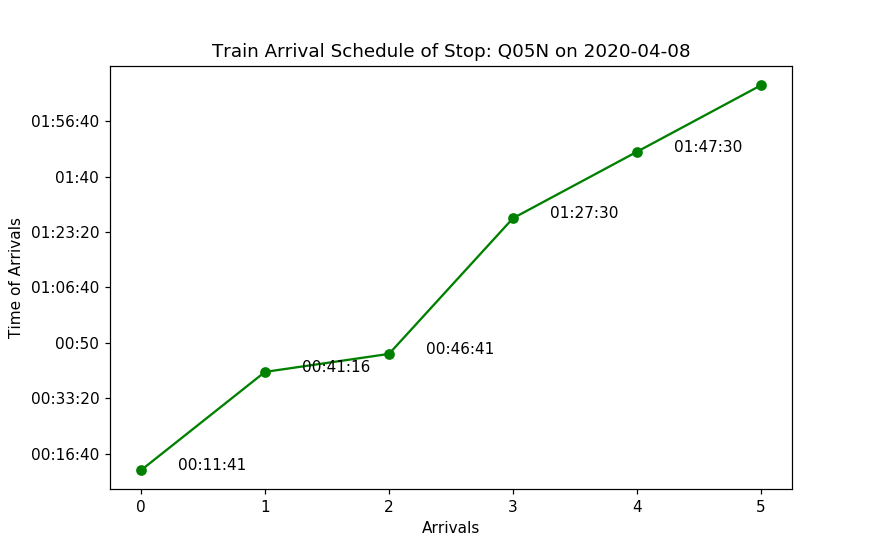

In [187]:
# Plot times using matplotlib
pd.plotting.register_matplotlib_converters()

# Plot size
plt.figure(figsize=(8, 5))

# Plot title
plt.title('Train Arrival Schedule of Stop: '+str(id)+' on '+str(times['date']))

# x and y labels
plt.ylabel('Time of Arrivals')
plt.xlabel('Arrivals')

# Line plot
plt.plot(x, y, 'go-')

# Lable points
for i, txt in enumerate(y):
    plt.annotate(txt, (x[i]+0.3, y[i]))

# Save plot as a png. image
plt.savefig('MTA_Plot1.png')
